In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,roc_auc_score, roc_curve, auc
)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.base import clone

In [3]:
df = pd.read_csv("CitarumWater.csv")
df.dropna(inplace=True)
df

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.570000,25.55°C,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.690000,25.55°C,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.390000,25.55°C,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.490000,25.55°C,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.170000,25.55°C,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,11/2/2022,6.030091,25.55°C,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1
2496,2497,Citarum,Wangisagara,11/3/2022,6.176031,25.55°C,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2
2497,2498,Citarum,Koyod,11/4/2022,7.776482,25.55°C,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2
2498,2499,Citarum,Setelah IPAL Cisirung,11/5/2022,7.047090,25.55°C,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2


In [4]:
df['Temp'] = df['Temp'].astype(str).str.replace('°C', '').replace('-', np.nan)
df.dropna(subset=['Temp'], inplace=True)
df['Temp'] = df['Temp'].astype(float)

# Ubah kolom waktu ke datetime
df['Waktu'] = pd.to_datetime(df['Waktu'], format='mixed', dayfirst=True, errors='coerce')
df.dropna(subset=['Waktu'], inplace=True)
df['Year'] = df['Waktu'].dt.year
df

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class,Year
0,1,Citarum,Wangisagara,2018-04-18,7.570000,25.55,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3,2018
1,2,Citarum,Koyod,2018-04-18,7.690000,25.55,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3,2018
2,3,Citarum,Setelah IPAL Cisirung,2018-04-18,7.390000,25.55,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3,2018
3,4,Citarum,Nanjung,2018-04-18,7.490000,25.55,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3,2018
4,5,Citarum,Outlet Waduk Jatiluhur,2018-04-18,7.170000,25.55,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,2022-02-11,6.030091,25.55,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1,2022
2496,2497,Citarum,Wangisagara,2022-03-11,6.176031,25.55,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2,2022
2497,2498,Citarum,Koyod,2022-04-11,7.776482,25.55,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2,2022
2498,2499,Citarum,Setelah IPAL Cisirung,2022-05-11,7.047090,25.55,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2,2022


In [5]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Class'])
df  

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class,Year,Label
0,1,Citarum,Wangisagara,2018-04-18,7.570000,25.55,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3,2018,2
1,2,Citarum,Koyod,2018-04-18,7.690000,25.55,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3,2018,2
2,3,Citarum,Setelah IPAL Cisirung,2018-04-18,7.390000,25.55,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3,2018,2
3,4,Citarum,Nanjung,2018-04-18,7.490000,25.55,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3,2018,2
4,5,Citarum,Outlet Waduk Jatiluhur,2018-04-18,7.170000,25.55,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,2022-02-11,6.030091,25.55,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1,2022,0
2496,2497,Citarum,Wangisagara,2022-03-11,6.176031,25.55,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2,2022,1
2497,2498,Citarum,Koyod,2022-04-11,7.776482,25.55,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2,2022,1
2498,2499,Citarum,Setelah IPAL Cisirung,2022-05-11,7.047090,25.55,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2,2022,1


In [6]:
X = df[['pH', 'DO', 'BOD', 'COD', 'TSS', 'Nitrat', 'Temp']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class,Year,Label
0,1,Citarum,Wangisagara,2018-04-18,7.570000,25.55,11.000000,6.110000,3.300000,6.100000,1.080000,17000.000000,0.043000,-,5.12,3,2018,2
1,2,Citarum,Koyod,2018-04-18,7.690000,25.55,13.000000,6.200000,5.310000,12.500000,1.850000,28000.000000,0.011000,-,5.91,3,2018,2
2,3,Citarum,Setelah IPAL Cisirung,2018-04-18,7.390000,25.55,15.000000,3.610000,7.400000,23.500000,1.250000,90000.000000,0.230000,-,7.76,3,2018,2
3,4,Citarum,Nanjung,2018-04-18,7.490000,25.55,17.000000,3.170000,8.130000,27.500000,1.210000,300000.000000,0.057000,-,9.61,3,2018,2
4,5,Citarum,Outlet Waduk Jatiluhur,2018-04-18,7.170000,25.55,6.000000,6.820000,2.890000,5.440000,1.040000,3000.000000,0.110000,-,2.44,2,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Citarum,Cisanti,2022-02-11,6.030091,25.55,21.152867,4.262901,1.741993,22.357555,1.604541,343.607898,0.056633,-,0.77,1,2022,0
2496,2497,Citarum,Wangisagara,2022-03-11,6.176031,25.55,27.077853,3.151708,5.146220,11.099887,2.266671,612.311167,0.071878,-,1.61,2,2022,1
2497,2498,Citarum,Koyod,2022-04-11,7.776482,25.55,22.022523,7.279574,5.865096,28.140202,2.103214,533.277383,0.044954,-,1.80,2,2022,1
2498,2499,Citarum,Setelah IPAL Cisirung,2022-05-11,7.047090,25.55,32.364635,1.485632,4.624189,29.394513,1.748222,425.598926,0.096612,-,1.46,2,2022,1


In [7]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

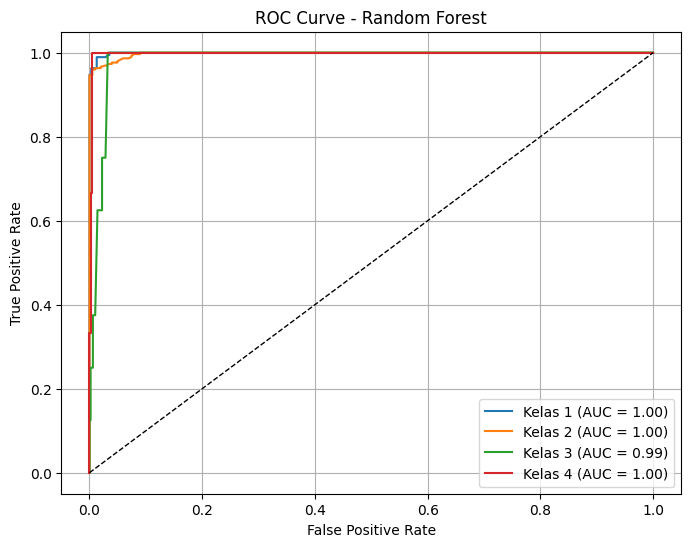


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       190
           2       0.98      0.97      0.97       299
           3       0.33      0.25      0.29         8
           4       0.50      0.67      0.57         3

    accuracy                           0.96       500
   macro avg       0.70      0.72      0.70       500
weighted avg       0.96      0.96      0.96       500



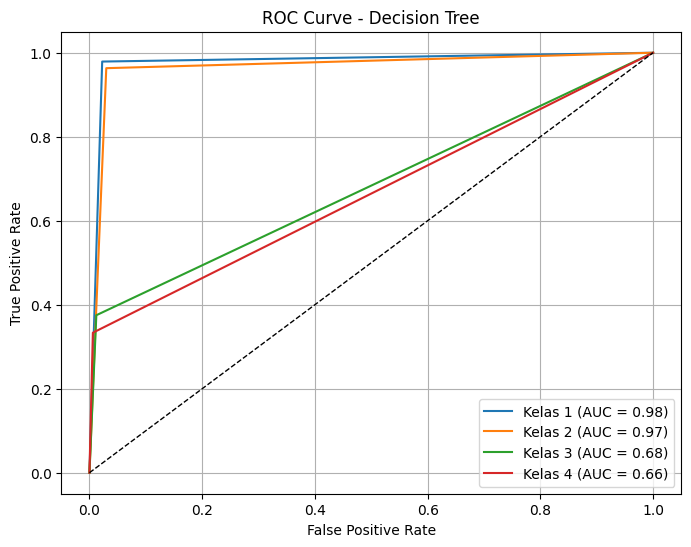


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       190
           2       0.98      0.96      0.97       299
           3       0.33      0.38      0.35         8
           4       0.25      0.33      0.29         3

    accuracy                           0.96       500
   macro avg       0.63      0.66      0.65       500
weighted avg       0.96      0.96      0.96       500



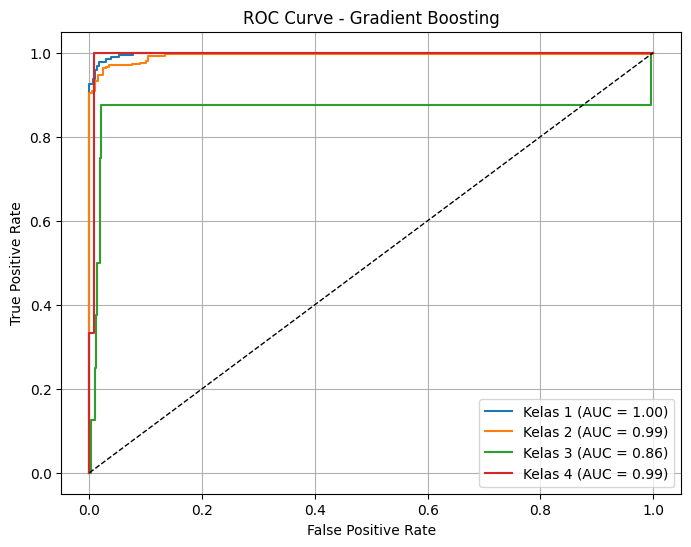


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       190
           2       0.98      0.97      0.97       299
           3       0.36      0.50      0.42         8
           4       0.25      0.33      0.29         3

    accuracy                           0.96       500
   macro avg       0.64      0.69      0.66       500
weighted avg       0.96      0.96      0.96       500



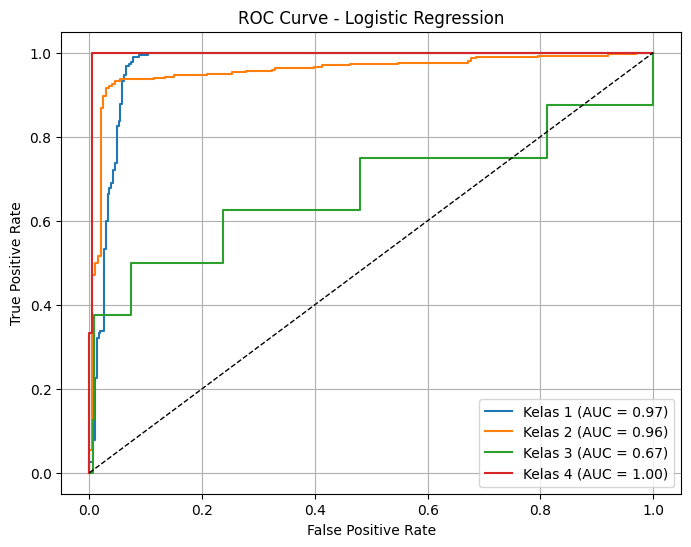


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.91      0.90       190
           2       0.92      0.94      0.93       299
           3       0.00      0.00      0.00         8
           4       1.00      0.33      0.50         3

    accuracy                           0.91       500
   macro avg       0.70      0.54      0.58       500
weighted avg       0.90      0.91      0.90       500


SVM Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       190
           2       0.95      0.93      0.94       299
           3       0.50      0.25      0.33         8
           4       0.00      0.00      0.00         3

    accuracy                           0.92       500
   macro avg       0.59      0.53      0.55       500
weighted avg       0.91      0.92      0.92       500



C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:18:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


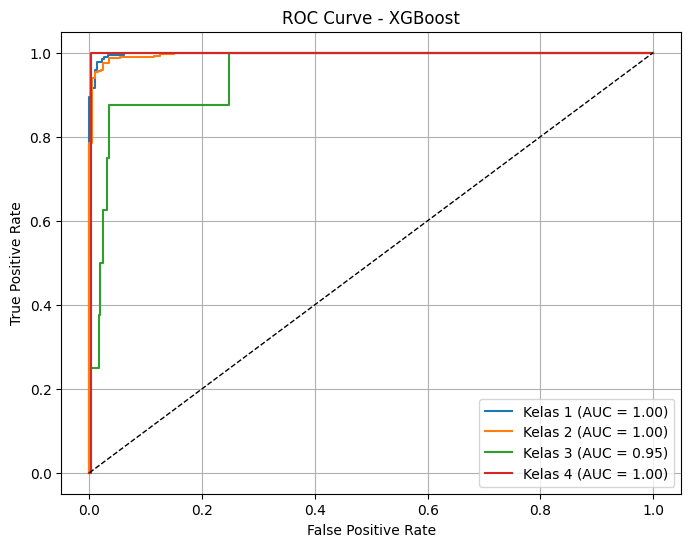


XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       190
           2       0.98      0.97      0.97       299
           3       0.40      0.25      0.31         8
           4       0.75      1.00      0.86         3

    accuracy                           0.96       500
   macro avg       0.77      0.80      0.78       500
weighted avg       0.96      0.96      0.96       500



In [23]:
from sklearn.preprocessing import label_binarize
results = []

label_names = [str(label) for label in le.inverse_transform(sorted(np.unique(y_test)))]
classes = np.unique(y_test)

for name, model in models.items():
    model_clone = clone(model)
    model_clone.fit(X_train, y_train)
    y_pred = model_clone.predict(X_test)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    auc_score = None
    if hasattr(model_clone, "predict_proba"):
        y_proba = model_clone.predict_proba(X_test)

        # Binarisasi y_test untuk multi-class ROC
        y_test_bin = label_binarize(y_test, classes=classes)
        
        # ROC curve per kelas
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(classes)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Macro AUC
        auc_score = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")

        # Plot ROC per kelas
        plt.figure(figsize=(8, 6))
        for i in range(len(classes)):
            plt.plot(fpr[i], tpr[i], label=f'Kelas {label_names[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': cm
    })

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_names, zero_division=0))


In [9]:
results_df = pd.DataFrame(results)
results_df_display = results_df.drop(columns=['Confusion Matrix'])
print("\nSummary Performance:\n")
print(results_df_display)


Summary Performance:

                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest     0.968   0.964778   0.968  0.965546
1        Decision Tree     0.948   0.949606   0.948  0.948687
2    Gradient Boosting     0.956   0.961123   0.956  0.958336
3  Logistic Regression     0.906   0.897206   0.906  0.900556
4                  SVM     0.922   0.913951   0.922  0.916940
5              XGBoost     0.964   0.961370   0.964  0.962138



# 📊 Evaluasi Model Machine Learning: Penjelasan & Rumus

##  1. Accuracy
**Definisi:** Proporsi prediksi yang benar dari seluruh prediksi.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Kelebihan:** Baik digunakan jika kelas seimbang.

**Kelemahan:** Bisa menyesatkan jika data tidak seimbang (misal: banyak lebih banyak pasien sehat daripada yang sakit).

---

##  2. Precision
**Definisi:** Proporsi prediksi positif yang benar-benar positif.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Interpretasi:** Dari semua yang diprediksi **positif (sakit jantung)**, berapa banyak yang benar-benar sakit.

**Kapan penting?** Saat **false positive** harus dihindari, seperti jika tindakan lanjutan (misalnya operasi) mahal atau berisiko.

---

##  3. Recall (Sensitivity / True Positive Rate)
**Definisi:** Proporsi kasus positif yang berhasil ditemukan model.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Interpretasi:** Dari semua yang **benar-benar sakit**, berapa banyak yang berhasil dideteksi.

**Kapan penting?** Sangat penting dalam **diagnosis medis**, karena kita ingin **meminimalkan False Negative** (orang sakit yang tidak terdeteksi).

---

##  4. F1-Score
**Definisi:** Rata-rata harmonik dari Precision dan Recall.

$$
\text{F1\text{-}Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Kelebihan:** Memberikan keseimbangan antara Precision dan Recall. Ideal ketika kita ingin mempertimbangkan keduanya secara seimbang.

---

## 
 5. ROC AUC (Receiver Operating Characteristic - Area Under Curve)
**Definisi:** Luas di bawah kurva ROC yang menggambarkan trade-off antara True Positive Rate dan False Positive Rate.

$$
\text{ROC AUC} = \int_{0}^{1} TPR(FPR) \, dFPR
$$

**Interpretasi:** Probabilitas bahwa model memberi skor lebih tinggi pada pasien positif daripada pasien negatif.

**Nilai:**
- 0.5 = seperti tebak-tebakan
- 1.0 = sempurna
- > 0.9 = sangat baik

---
